# Лабораторная работа №5
## Численное решение системы линейных уравнений и численное интегрирование

*Выполнил: * Злобин Дмитрий Алексеевич, варинат 22

Нужно решить для $n = 1000$ систему уравнений с относительной точностью $\epsilon$ = 0.001:

$
\begin{cases}
x_1 = 1, \\
(1+\frac{1}{i})x_{i-1} - (4+\frac{\sin(i)}{i^2}+\cos(i)^2)x_i+x_{i+1} = -1 + \int_{2}^{3} \frac{\ln(t+i)}{1+i^2*t^2} dt,\hspace{0.5cm}  \overline{2,n-1}, \\
x_n=1.
\end{cases}
$

$*$ Используя для вычисления интеграла формулу Симпсона с относительной точностью $\epsilon$ = 0.01  

*Теоретическая часть*

**Рекуррентная квадратурная формула трапеций.**
Определим $T(0) = h/2(f(α) + f(β)),  h = β − α$. Здесь $\alpha$ и $\beta$  - соответсвтенно нижний и верхний пределы интегрирования.
Затем для каждого $N ≥ 1$ определим $T(N) = T(f,h)$, где $T(f,h)$ - формула трапеций с шагом $h = (β − α)/2^N$. Тогда
$T(N) =\frac{T(N − 1)}{2} + h\sum_{k=1}^M f(x_{2k-1}), \hspace{0.5cm}N =1,2,... \hspace{0.5cm}(1)$,
где $h = (β−α)/2^N$ и точки $x_k = α+kh$ делят интервал $[α,β]$ на $2^N = 2M$
точек.
**Рекуррентная квадратурная формула Симпсона.**
Преположим,что ${T(N)}$ - последовательность формул трапеций, сгенерированных согласно (1). Если $N ≥ 1$ и $S(N)$ - квадратурная формула
Симпсона для $2^N$ подинтервалов области $[α, β]$, тогда
$S(N) =\frac{4T(N) − T(N − 1)}{3}$,$ \hspace{0.5cm}N = 1,2...$ . (2)


+ Следующим заданием являлось решение системы одношаговым циклическим методом Зейделя для $n = 1000$, для чего был написан код, определяющий все нужные в используемом методе матрицы:

**Одношаговый циклический метод Зейделя**

Метод является итерационным, т.е. решение системы $Ax = b$, где

$A$ - матрица коэффициентов

$A = \begin{pmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\         
\vdots & \vdots & \ddots & \vdots \\
a_{n1} & a_{n2} & \cdots & a_{nn}
\end{pmatrix}$, 

$b$ - заданный вектор правых частей уравнений

$b = \begin{pmatrix}
b_{1}  \\
b_{2}  \\         
\vdots  \\
b_{n} 
\end{pmatrix}$, 

$x$ - вектор неизвестных

$x = \begin{pmatrix}
x_{1}  \\
x_{2}  \\         
\vdots  \\
x_{n} 
\end{pmatrix}$,  

получается как предел последовательности векторов $\{x^1,x^2,...\}$  , каждый последующий элемент которой вычисляется по определенному правилу. Начальный элемент $x^1$  выбирается произвольно. Последовательность $\{x^1,x^2,...\}$  называется итерационной, а ее элементы - последовательными итерациями.
Как правило, для итерационного метода решения системы правило построения элементов итеарционной последовательности записывается в виде
$x^{k+1}=T_kx^k+H_kb$.
В методе Зейделя $H_k = (E-M)^{-1}$  , $T_k = (E-M)^{-1}N$  , где $M+N = E-A$, $M$  - нижняя треугольная матрица с нулевыми диагональными элементами, $N$ - верхняя треугольная матрица:           

$M = \begin{pmatrix}
0 & 0 & \cdots & 0 \\
-a_{21} & 0 & \cdots & 0 \\         
\vdots & \vdots & \ddots & \vdots \\
-a_{n1}  & \cdots & -a_{nn-1} & 0
\end{pmatrix}$,

$N = \begin{pmatrix}
1-a_{11} & -a_{12} & \cdots & -a_{1n} \\
0 & 1-a_{22} & \cdots & -a_{2n} \\         
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 1-a_{nn}
\end{pmatrix}$,

т.е. имеем
$x^{k+1}=(E-M)^{-1}Nx^k+(E-M)^{-1}b$



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import log1p,cos,sin
from scipy import *
from scipy.linalg import *
%matplotlib inline 


+ был построен график подынтегральной функции для 5 различных значений параметра $i$



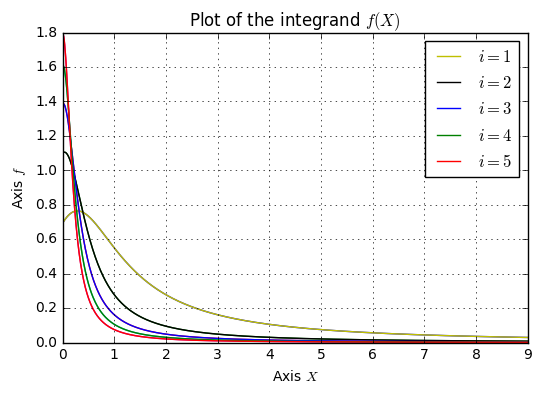

In [12]:
np.set_printoptions(precision = 4, suppress = True, linewidth = 250)
%matplotlib inline


eps1 = 0.01
eps2 = 0.001

def f(x, i):
    return log1p(x+i)/(1+i**2*x**2)

def RecSimpInt(i, a, b, eps1):
    N = 1
    T = (b-a)/2*(f(a, i) + f(b, i))
    while True:
        PreviousT = T
        num = 2**N
        M = 2**(N-1)
        h = (b-a)/num
        X = []
        for k in range(0, num+1):
            X.append(a+k*h)
        summ = 0
        for j in range(1, M+1):
            summ = summ + f(X[2*j-1], i)
        T = T/2 + h*summ     
        S = (4*T - PreviousT)/3
        N = N + 1
        if  (abs(T-PreviousT)/PreviousT < eps1) or (N>20):
            break
    return S
    print(S)

x = np.arange(0, 9+0.01, 0.01)
for i in  range(1, 5+1):
    plt.plot(x, f(x, i))
    
plt.plot(x, f(x,1), label = '$i = 1$', )
plt.plot(x, f(x,2), label = '$i = 2$', )
plt.plot(x, f(x,3), label = '$i = 3$', )
plt.plot(x, f(x,4), label = '$i = 4$', )
plt.plot(x, f(x,5), label = '$i = 5$', )

plt.xlabel('Axis $X$')
plt.ylabel('Axis $f$')
plt.title('Plot of the integrand $f(X)$')
plt.grid()
plt.legend()

    

+ Построен график зависимости значения интеграла от номера итерации реккурентного метода Симпсона 

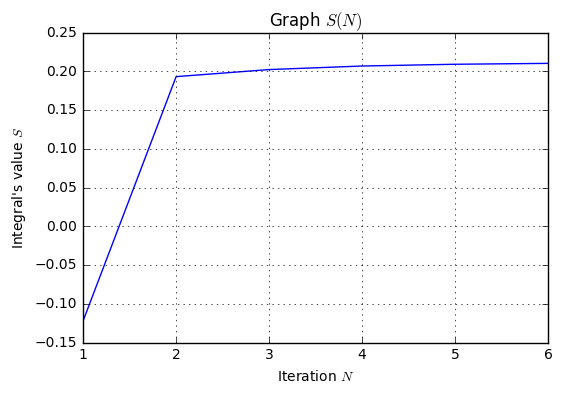

In [13]:
a = 2
b = 3
N = 1
T = 1
S = []
eps1 = 0.01
n = []
i = 1
while True:    
    PreviousT = T    
    num = 2**N
    M = 2**(N-1)
    h = (b-a)/num    
    X = []
    for k in range(0, num+1):
        X.append(a+k*h)    
    summ = 0
    for j in range(1, M+1):
        summ = summ + f(X[2*j-1], i)    
    if N == 1:
        T = h/2*(f(a, i) + f(b, i))    
    T = T/2 + h*summ    
    N = N + 1     
    S.append((4*T - PreviousT)/3)        
    n.append(N-1)
    if  (abs(T - PreviousT)/PreviousT < eps1) or (N>10):
        break
plt.plot(n, S)
plt.xlabel('Iteration $N$')
plt.ylabel('Integral\'s value $S$')
plt.title('Graph $S(N)$')
plt.grid()
        

+ С помощью метода Зейделя вычилясляем систему уравнений опираясь на теоретичесие выкладки

In [20]:
n = 1000

a = []
for i in range(2,n-1+1):
    a.append((1/i)-(4 + sin(i)/i**2 + cos(i**2)))
a = np.array(a)

b = []
for i in range(2,n-1+1):
    b.append(-1 + RecSimpInt(i, 2, 3, eps1))
b = np.array(b)

A = np.zeros((n,n))
A[0,0] = 0.999
A[n-1,n-1] = 0.999
A[n-1,0] = 0.01
for i in range(1,n-2+1):
    A[i,i-1] = 0; A[i,i] = 0.999; A[i,i+1] = 0

B = np.zeros((n,1))
B[0] = 0
B[n-1] = 1
for i in range(1,n-2+1):
    B[i] = b[i-1]

M = np.zeros((n,n))
for i in range(1,n-1+1):
    M[i,i-1] = -A[i,i-1]
M[n-1,0] = -A[n-1,0]  

N = np.zeros((n,n))
for i in range(0,n-1+1):
    N[i,i] = 1 - A[i,i]
    if i == n-1:
        break
    N[i,i+1] = -A[i,i+1]
C = np.linalg.inv(np.eye(n)-M)
print('A:\n', A, '\n\n', 'M:\n', M, '\n\n', 'N:\n', N, '\n\n', 'B:\n', B, '\n\n')
print('C:\n', C)



A:
 [[ 0.999  0.     0.    ...,  0.     0.     0.   ]
 [ 0.     0.999  0.    ...,  0.     0.     0.   ]
 [ 0.     0.     0.999 ...,  0.     0.     0.   ]
 ..., 
 [ 0.     0.     0.    ...,  0.999  0.     0.   ]
 [ 0.     0.     0.    ...,  0.     0.999  0.   ]
 [ 0.01   0.     0.    ...,  0.     0.     0.999]] 

 M:
 [[ 0.    0.    0.   ...,  0.    0.    0.  ]
 [-0.    0.    0.   ...,  0.    0.    0.  ]
 [ 0.   -0.    0.   ...,  0.    0.    0.  ]
 ..., 
 [ 0.    0.    0.   ...,  0.    0.    0.  ]
 [ 0.    0.    0.   ..., -0.    0.    0.  ]
 [-0.01  0.    0.   ...,  0.   -0.    0.  ]] 

 N:
 [[ 0.001 -0.     0.    ...,  0.     0.     0.   ]
 [ 0.     0.001 -0.    ...,  0.     0.     0.   ]
 [ 0.     0.     0.001 ...,  0.     0.     0.   ]
 ..., 
 [ 0.     0.     0.    ...,  0.001 -0.     0.   ]
 [ 0.     0.     0.    ...,  0.     0.001 -0.   ]
 [ 0.     0.     0.    ...,  0.     0.     0.001]] 

 B:
 [[ 0.    ]
 [-0.9325]
 [-0.9662]
 [-0.9793]
 [-0.9859]
 [-0.9897]
 [-0.9921]
 [-0.9937]

0.031622778182822629

In [23]:
XX = np.zeros((n,1))
k = 0
normXX = [np.linalg.norm(XX)]
while True:
    PreviousXX = XX
    XX = np.dot(np.dot(C,N),XX) + np.dot(C,B)
    n1 = np.linalg.norm(PreviousXX)
    n2 = np.linalg.norm(XX)
    n3 = np.linalg.norm(XX-PreviousXX)
    k += 1
    normXX.append(n2)
    #print(n1,'\n', n2,'\n', n3, '\n',  n3/n2, '\n', XX )
    if  (n3/n2<eps2) or (k>15):
        break
        
K = np.arange(0,k+1)  

#Вывод искомого вектора неизвестных:        
print(k,'\n', XX) 

#Проверка работы метода Зейделя:
print(np.dot(A,XX),'\n\n', B)

2 
 [[ 0.    ]
 [-0.9334]
 [-0.9672]
 [-0.9803]
 [-0.9869]
 [-0.9907]
 [-0.993 ]
 [-0.9947]
 [-0.9958]
 [-0.9967]
 [-0.9973]
 [-0.9978]
 [-0.9982]
 [-0.9986]
 [-0.9988]
 [-0.9991]
 [-0.9993]
 [-0.9994]
 [-0.9996]
 [-0.9997]
 [-0.9998]
 [-0.9999]
 [-1.    ]
 [-1.    ]
 [-1.0001]
 [-1.0002]
 [-1.0002]
 [-1.0003]
 [-1.0003]
 [-1.0003]
 [-1.0004]
 [-1.0004]
 [-1.0004]
 [-1.0005]
 [-1.0005]
 [-1.0005]
 [-1.0005]
 [-1.0006]
 [-1.0006]
 [-1.0006]
 [-1.0006]
 [-1.0006]
 [-1.0007]
 [-1.0007]
 [-1.0007]
 [-1.0007]
 [-1.0007]
 [-1.0007]
 [-1.0007]
 [-1.0007]
 [-1.0007]
 [-1.0008]
 [-1.0008]
 [-1.0008]
 [-1.0008]
 [-1.0008]
 [-1.0008]
 [-1.0008]
 [-1.0008]
 [-1.0008]
 [-1.0008]
 [-1.0008]
 [-1.0008]
 [-1.0008]
 [-1.0008]
 [-1.0008]
 [-1.0008]
 [-1.0008]
 [-1.0008]
 [-1.0009]
 [-1.0009]
 [-1.0009]
 [-1.0009]
 [-1.0009]
 [-1.0009]
 [-1.0009]
 [-1.0009]
 [-1.0009]
 [-1.0009]
 [-1.0009]
 [-1.0009]
 [-1.0009]
 [-1.0009]
 [-1.0009]
 [-1.0009]
 [-1.0009]
 [-1.0009]
 [-1.0009]
 [-1.0009]
 [-1.0009]
 [-1.0

+ Построены графики зависимости от $i$ и $k$

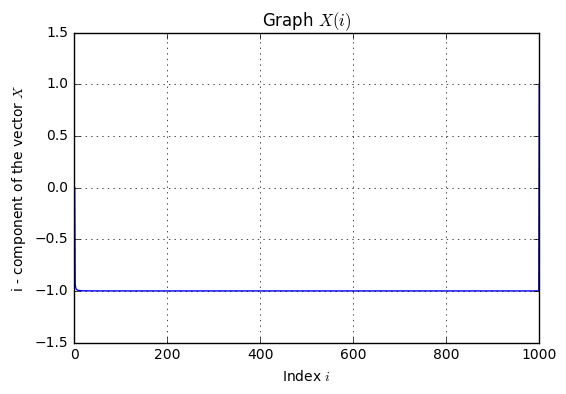

In [18]:
i = np.arange(1, n+1)
plt.plot(i,XX)
plt.xlabel('Index $i$')
plt.ylabel('i - component of the vector $X$')
plt.title('Graph $X(i)$')
plt.grid()

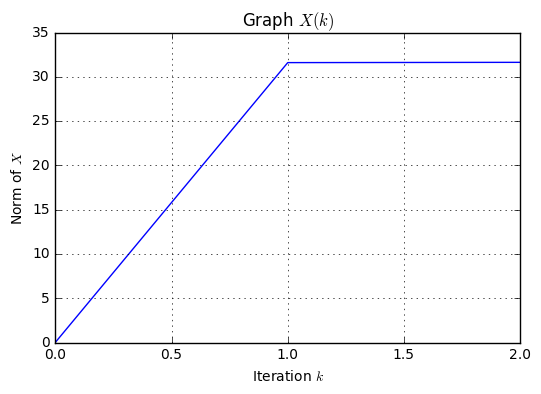

In [19]:
plt.plot(K,normXX)
plt.xlabel('Iteration $k$')
plt.ylabel('Norm of $X$')
plt.title('Graph $X(k)$')
plt.grid()